**Table of contents**<a id='toc0_'></a>    
- [Data loading and cleaning](#toc1_)    
- [EDA](#toc2_)    
  - [Which states have the most sales?](#toc2_1_)    
  - [The difference between New York and California in terms of sales and profit](#toc2_2_)    
  - [The outstanding customer in New York](#toc2_3_)    
  - [The differences among states in profitability](#toc2_4_)    
  - [If 20% of the customers contribute to 80% of the profit](#toc2_5_)    
  - [Top 20 cities by Sales and Profit](#toc2_6_)    
  - [The Top 20 customers by Sales](#toc2_7_)    
  - [The Cumulative curve in Sales by Customers](#toc2_8_)    
- [Conclusions](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data loading and cleaning](#toc0_)

In [1]:
!kaggle datasets download -d vivek468/superstore-dataset-final --unzip

Dataset URL: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final
License(s): other




  0%|          | 0.00/550k [00:00<?, ?B/s]
100%|██████████| 550k/550k [00:00<00:00, 714kB/s]
100%|██████████| 550k/550k [00:00<00:00, 714kB/s]


In [3]:
import pandas as pd

data = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')

data.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [5]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [7]:
data.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

# <a id='toc2_'></a>[EDA](#toc0_)

## <a id='toc2_1_'></a>[Which states have the most sales?](#toc0_)

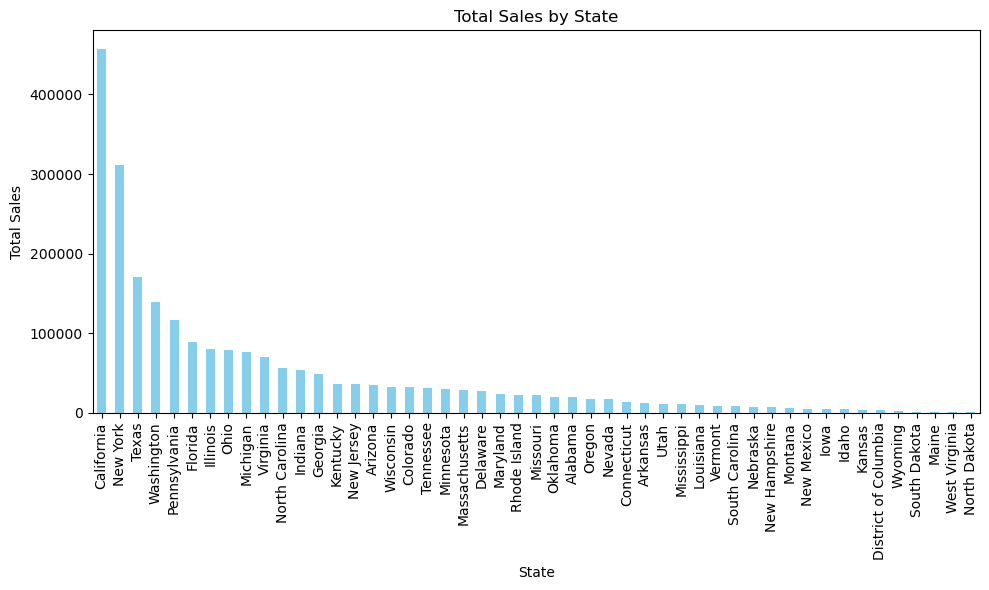

In [9]:
import matplotlib.pyplot as plt

sales_by_state = data.groupby('State')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sales_by_state.plot(kind='bar', color='skyblue')
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## <a id='toc2_2_'></a>[The difference between New York and California in terms of sales and profit](#toc0_)

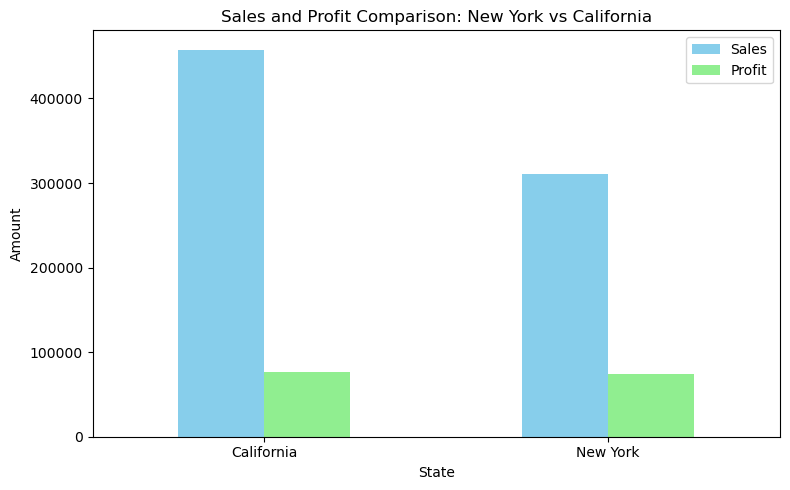

,Sales,Profit
State,,
California,457687.6315,76381.3871
New York,310876.2710,74038.5486


In [10]:
# Filter data for New York and California
ny_ca_data = data[data['State'].isin(['New York', 'California'])]

# Group by state and calculate total sales and total profit
ny_ca_summary = ny_ca_data.groupby('State')[['Sales', 'Profit']].sum()


ny_ca_summary.plot(kind='bar', figsize=(8,5), color=['skyblue', 'lightgreen'])
plt.title('Sales and Profit Comparison: New York vs California')
plt.xlabel('State')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

ny_ca_summary


## <a id='toc2_3_'></a>[The outstanding customer in New York](#toc0_)

In [11]:
ny_data = data[data['State'] == 'New York']

ny_customer_sales = ny_data.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)

outstanding_customer_ny = ny_customer_sales.head(1)
outstanding_customer_ny


Customer Name
Tom Ashbrook    13723.498
Name: Sales, dtype: float64

## <a id='toc2_4_'></a>[The differences among states in profitability](#toc0_)

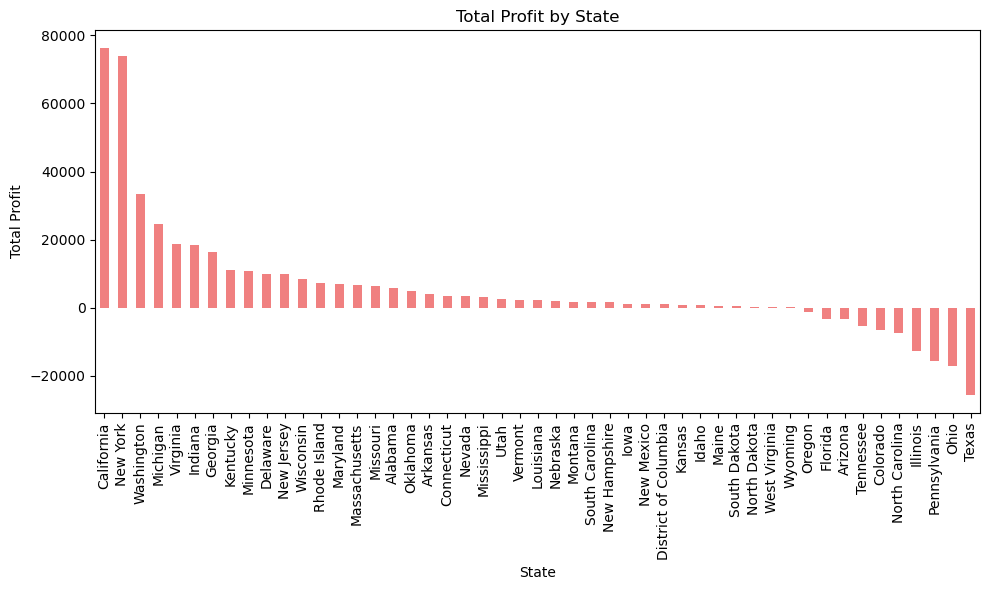

In [12]:
profit_by_state = data.groupby('State')['Profit'].sum().sort_values(ascending=False)


plt.figure(figsize=(10,6))
profit_by_state.plot(kind='bar', color='lightcoral')
plt.title('Total Profit by State')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## <a id='toc2_5_'></a>[If 20% of the customers contribute to 80% of the profit](#toc0_)

In [13]:
# Sort customers by total profit contribution
customer_profit = data.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False)
customer_profit

Customer Name
Tamara Chand      8981.3239
Raymond Buch      6976.0959
Sanjit Chand      5757.4119
Hunter Lopez      5622.4292
Adrian Barton     5444.8055
                    ...    
Henry Goldwyn    -2797.9635
Sharelle Roach   -3333.9144
Luke Foster      -3583.9770
Grant Thornton   -4108.6589
Cindy Stewart    -6626.3895
Name: Profit, Length: 793, dtype: float64

In [15]:
# Calculate cumulative percentage of profit
cumulative_profit = customer_profit.cumsum() / customer_profit.sum()
cumulative_profit

Customer Name
Tamara Chand      0.031360
Raymond Buch      0.055718
Sanjit Chand      0.075821
Hunter Lopez      0.095452
Adrian Barton     0.114464
                    ...   
Henry Goldwyn     1.061638
Sharelle Roach    1.049997
Luke Foster       1.037483
Grant Thornton    1.023137
Cindy Stewart     1.000000
Name: Profit, Length: 793, dtype: float64

In [17]:
# Find the number of customers that account for 80% of the profit
pareto_cutoff = cumulative_profit[cumulative_profit <= 0.80]
pareto_cutoff

Customer Name
Tamara Chand         0.031360
Raymond Buch         0.055718
Sanjit Chand         0.075821
Hunter Lopez         0.095452
Adrian Barton        0.114464
                       ...   
Rick Reed            0.789589
Alan Schoenberger    0.792102
William Brown        0.794596
Fred Chung           0.797090
Roland Fjeld         0.799575
Name: Profit, Length: 152, dtype: float64

In [18]:
# Percentage of customers contributing to 80% of the profit
percent_customers = len(pareto_cutoff) / len(customer_profit) * 100
percent_customers

19.167717528373267

Approximately 19% of the customers contribute to 80% of the total profit, which closely aligns with the Pareto Principle (80/20 rule). This suggests that focusing on the top 20% of customers could be an effective strategy for maximizing profit.

## <a id='toc2_6_'></a>[Top 20 cities by Sales and Profit](#toc0_)

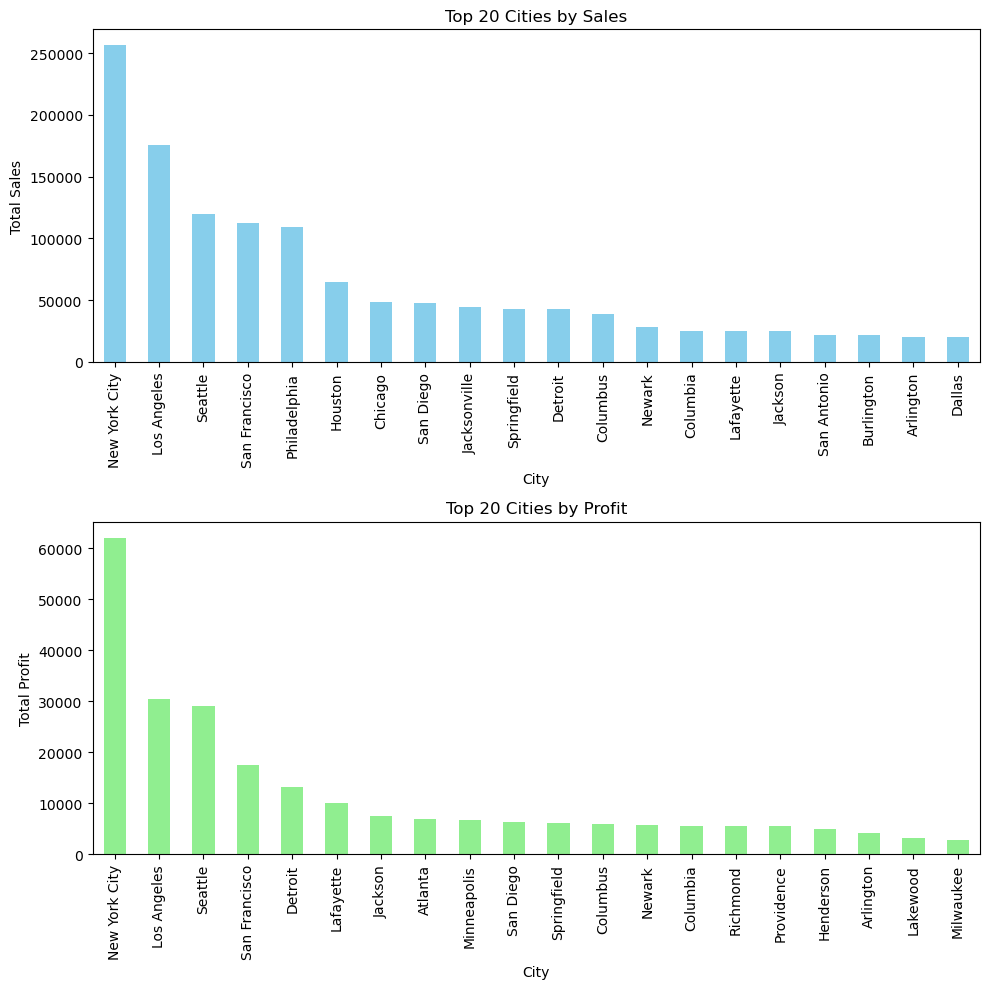

In [20]:
# Group data by City and calculate total sales and profit
city_sales = data.groupby('City')['Sales'].sum().sort_values(ascending=False).head(20)
city_profit = data.groupby('City')['Profit'].sum().sort_values(ascending=False).head(20)

# Plot the top 20 cities by sales and profit
fig, axes = plt.subplots(2, 1, figsize=(10,10))

city_sales.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Top 20 Cities by Sales')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Total Sales')
axes[0].tick_params(axis='x', rotation=90)

city_profit.plot(kind='bar', color='lightgreen', ax=axes[1])
axes[1].set_title('Top 20 Cities by Profit')
axes[1].set_xlabel('City')
axes[1].set_ylabel('Total Profit')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


- New York City, Los Angeles, and Seattle rank high in both sales and profit.
- However, cities like Detroit and Lafayette rank higher in profit than in sales, indicating better profitability.
- Conversely, cities like Philadelphia and Houston rank high in sales but are absent from the top 20 in profit, suggesting lower profitability in these locations.

## <a id='toc2_7_'></a>[The Top 20 customers by Sales](#toc0_)

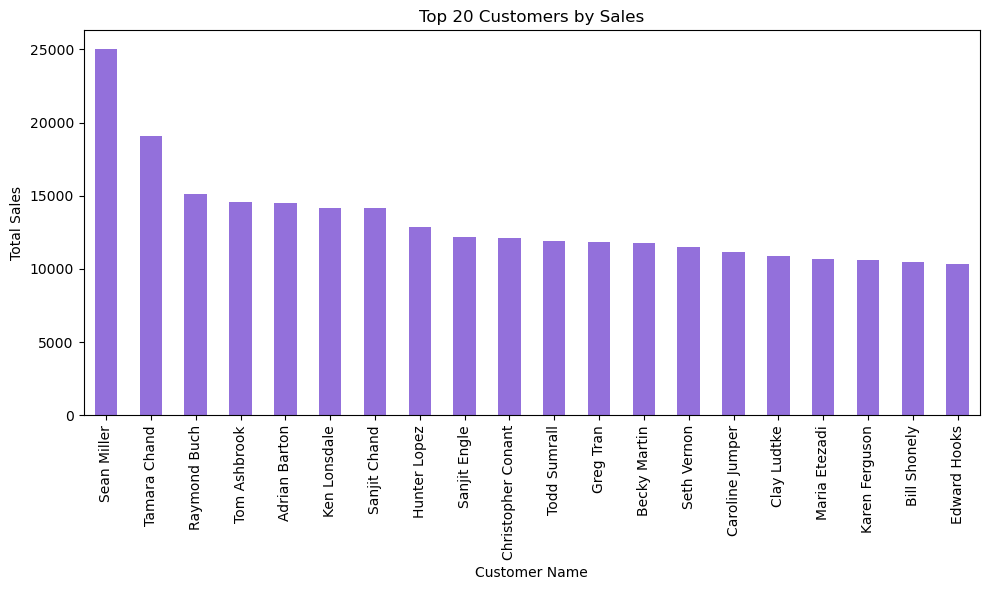

Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Todd Sumrall          11891.751
Greg Tran             11820.120
Becky Martin          11789.630
Seth Vernon           11470.950
Caroline Jumper       11164.974
Clay Ludtke           10880.546
Maria Etezadi         10663.728
Karen Ferguson        10604.266
Bill Shonely          10501.653
Edward Hooks          10310.880
Name: Sales, dtype: float64

In [24]:
customer_sales = data.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)
customer_sales_top20 = customer_sales.head(20)

plt.figure(figsize=(10,6))
customer_sales_top20.plot(kind='bar', color='mediumpurple')
plt.title('Top 20 Customers by Sales')
plt.xlabel('Customer Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

customer_sales_top20


## <a id='toc2_8_'></a>[The Cumulative curve in Sales by Customers](#toc0_)

In [26]:
# Calculate cumulative sales by customers

cumulative_sales = customer_sales.cumsum() / customer_sales.sum()
cumulative_sales

Customer Name
Sean Miller        0.010902
Tamara Chand       0.019195
Raymond Buch       0.025776
Tom Ashbrook       0.032130
Adrian Barton      0.038430
                     ...   
Roy Skaria         0.999981
Mitch Gastineau    0.999988
Carl Jackson       0.999996
Lela Donovan       0.999998
Thais Sissman      1.000000
Name: Sales, Length: 793, dtype: float64

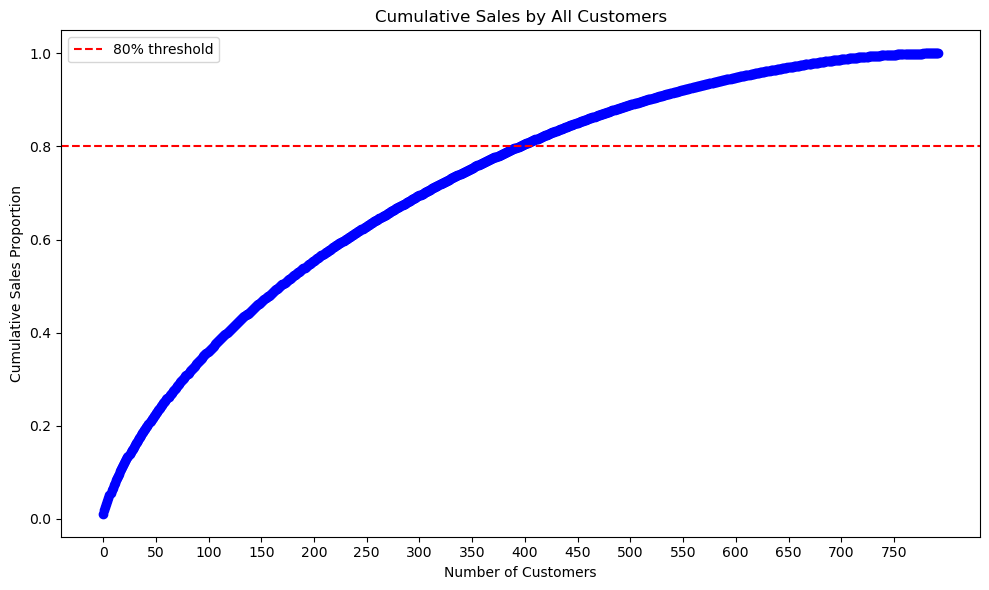

In [29]:
# Plot cumulative sales curve for all customers
plt.figure(figsize=(10,6))
plt.plot(cumulative_sales.values, marker='o', linestyle='-', color='blue')  
plt.title('Cumulative Sales by All Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Cumulative Sales Proportion')

# Set x-axis ticks to have numerical marks at regular intervals (e.g., 0, 50, 100, etc.)
plt.xticks(ticks=range(0, len(cumulative_sales), 50))

plt.axhline(y=0.80, color='r', linestyle='--', label='80% threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [31]:
sales_pareto_cutoff = cumulative_sales[cumulative_sales <= 0.80]
sales_pareto_cutoff

Customer Name
Sean Miller       0.010902
Tamara Chand      0.019195
Raymond Buch      0.025776
Tom Ashbrook      0.032130
Adrian Barton     0.038430
                    ...   
Jamie Frazer      0.795646
Fred Harton       0.796635
Craig Carreira    0.797623
Bobby Elias       0.798607
Kalyca Meade      0.799591
Name: Sales, Length: 395, dtype: float64

In [32]:
# Percentage of customers contributing to 80% of the profit
sales_percent_customers = len(sales_pareto_cutoff) / len(cumulative_sales) * 100
sales_percent_customers

49.810844892812106

So, Pareto Principle is not applied here.

# <a id='toc3_'></a>[Conclusions](#toc0_)

- California and New York should be key focus areas for marketing strategies due to their high sales and profit performance.
- Cities such as New York City, Los Angeles, and Seattle also represent top opportunities for both sales and profit maximization.
- Prioritizing the top 20% of customers who contribute to 80% of profit would optimize resource allocation and marketing efforts.
- Further analysis could focus on cities with high sales but lower profitability, like Philadelphia, to investigate reasons for the lower profit margins.